<a href="https://colab.research.google.com/github/pawan-iit/Img-Classification-CNN/blob/main/M22AI596_Gurumukhi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten


In [26]:
# Define the paths to your image folders
train_path = '/content/drive/MyDrive/ML_Assignment3/Q2/train'
val_path = '/content/drive/MyDrive/ML_Assignment3/Q2/val/'


In [27]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file)
      if file_path.endswith(('.tiff','.bmp')):
       # Load the image and resize it to the desired size
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        # Append the image and label to the lists
      images.append(img)
      labels.append(label)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [28]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file)
      if file_path.endswith(('.tiff','.bmp')):
      # Load the image and resize it to the desired size
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size_val)
      # Append the image and label to the lists
      images_val.append(img)
      labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)


In [29]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


1000
178
(1000, 32, 32)
(178, 32, 32)


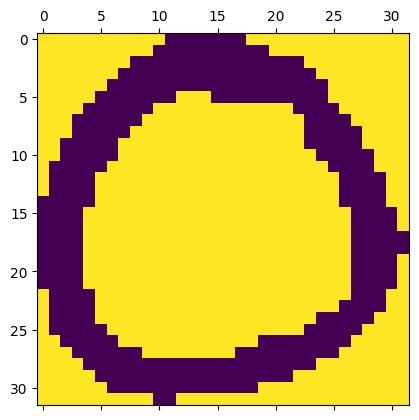

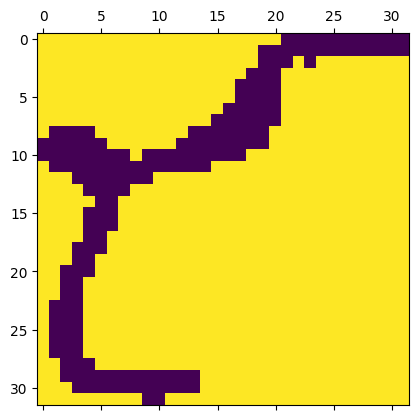

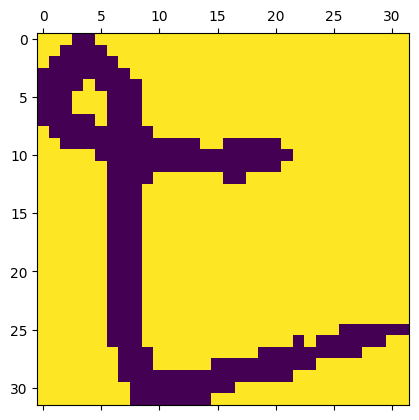

In [30]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])


In [31]:
# activation function is sigmoid
model = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))


Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 147.5130 - accuracy: 0.4060 - val_loss: 66.5938 - val_accuracy: 0.6067
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 25.8611 - accuracy: 0.8100 - val_loss: 36.4828 - val_accuracy: 0.7135
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 12.8391 - accuracy: 0.8860 - val_loss: 33.1246 - val_accuracy: 0.7584
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 10.9866 - accuracy: 0.8880 - val_loss: 28.1186 - val_accuracy: 0.8258
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 9.9242 - accuracy: 0.8910 - val_loss: 29.4449 - val_accuracy: 0.8146
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 4.9415 - accuracy: 0.9540 - val_loss: 21.0885 - val_accuracy: 0.8539
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 2.6157 - accuracy: 0.9720 - val_loss: 22.5550 - val_accuracy: 0.8483
Epoch 8

In [32]:
# Observation : we see a better accuracy from the 2nd iteration
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.8252 - accuracy: 0.8490 - val_loss: 1.1364 - val_accuracy: 0.6910
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.8500 - val_loss: 1.0709 - val_accuracy: 0.7697
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7737 - accuracy: 0.8870 - val_loss: 1.0162 - val_accuracy: 0.8146
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7345 - accuracy: 0.9240 - val_loss: 0.9754 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.9460 - val_loss: 0.9484 - val_accuracy: 0.8539
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.9580 - val_loss: 0.9296 - val_accuracy: 0.8596
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.9660 - val_loss: 0.9141 - val_accuracy: 0.8708
Epoch 8/10
32/32 [==

In [33]:
# Observation : we got better result for all iterations on scaling the training dataset


In [34]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 3ms/step - loss: 0.8834 - accuracy: 0.8876


[0.8834304809570312, 0.8876404762268066]

In [35]:
# Observation : result almost same as the training dataset,


6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


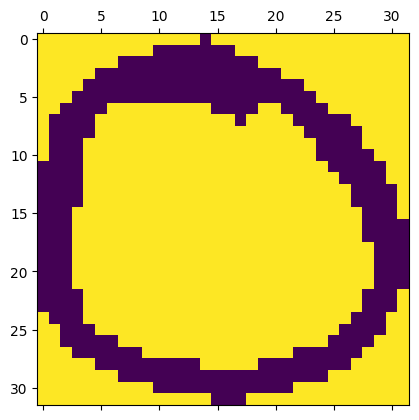

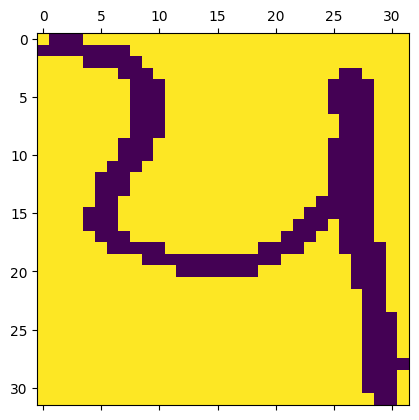

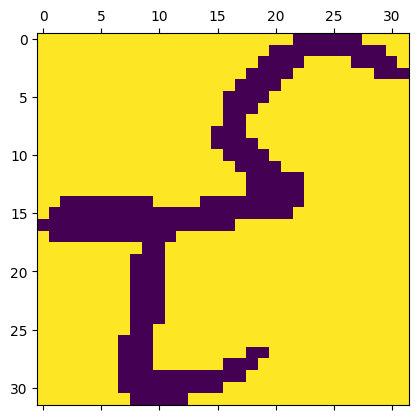

In [36]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))


In [37]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat


[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 7, 7, 1, 7, 7, 7, 4, 5, 7, 7, 2, 2, 2, 2, 9, 2, 3, 5, 2, 2, 2, 9, 2, 3, 3, 3, 3, 6, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  9,  1,  1,  2,  0,  2,  0,  2],
       [ 0,  0,  1, 15,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

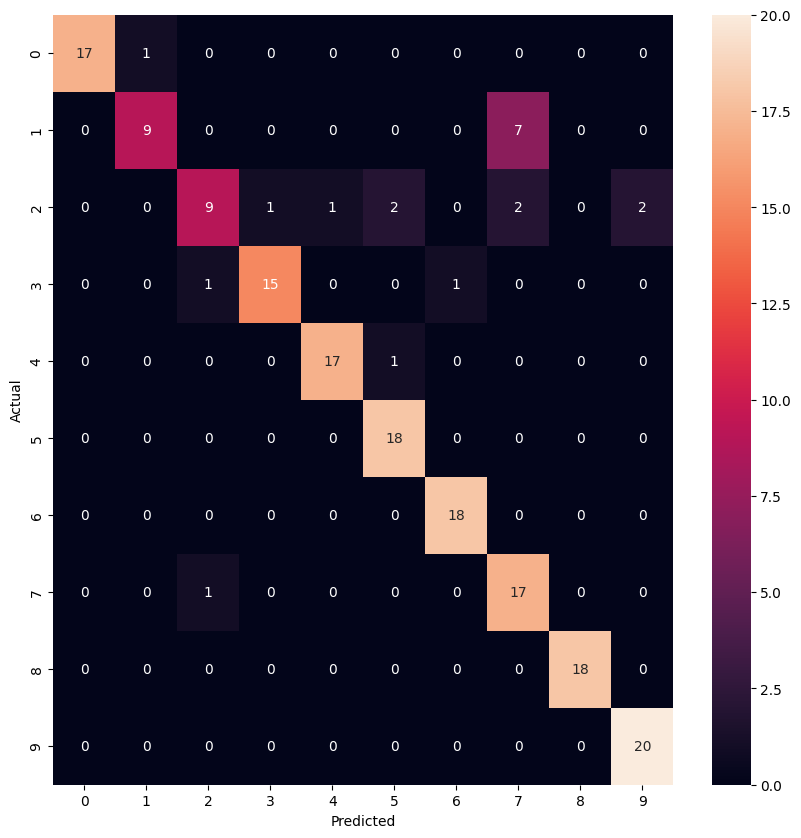

In [38]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [39]:
# here we can see there are some errors
# we need to modify our nn, we add some layers in the above model and different activation function


In [40]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
32/32 [==============================] - 1s 24ms/step - loss: 1.2147 - accuracy: 0.6930 - val_loss: 0.5159 - val_accuracy: 0.7978
Epoch 2/10
32/32 [==============================] - 1s 19ms/step - loss: 0.2015 - accuracy: 0.9400 - val_loss: 0.3655 - val_accuracy: 0.8876
Epoch 3/10
32/32 [==============================] - 1s 18ms/step - loss: 0.1023 - accuracy: 0.9760 - val_loss: 0.2426 - val_accuracy: 0.9213
Epoch 4/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0627 - accuracy: 0.9840 - val_loss: 0.2338 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 1s 20ms/step - loss: 0.1159 - accuracy: 0.9600 - val_loss: 0.1734 - val_accuracy: 0.9551
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 0.0578 - accuracy: 0.9880 - val_loss: 0.2274 - val_accuracy: 0.9326
Epoch 7/10
32/32 [==============================] - 1s 29ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 0.1993 - val_accuracy: 0.9438
Epoch 8/10
32

In [41]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 20ms/step - loss: 0.1816 - accuracy: 0.9551


[0.1816171556711197, 0.9550561904907227]

In [42]:
# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat


6/6 [==============================] - 0s 5ms/step
[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 5, 2, 4, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

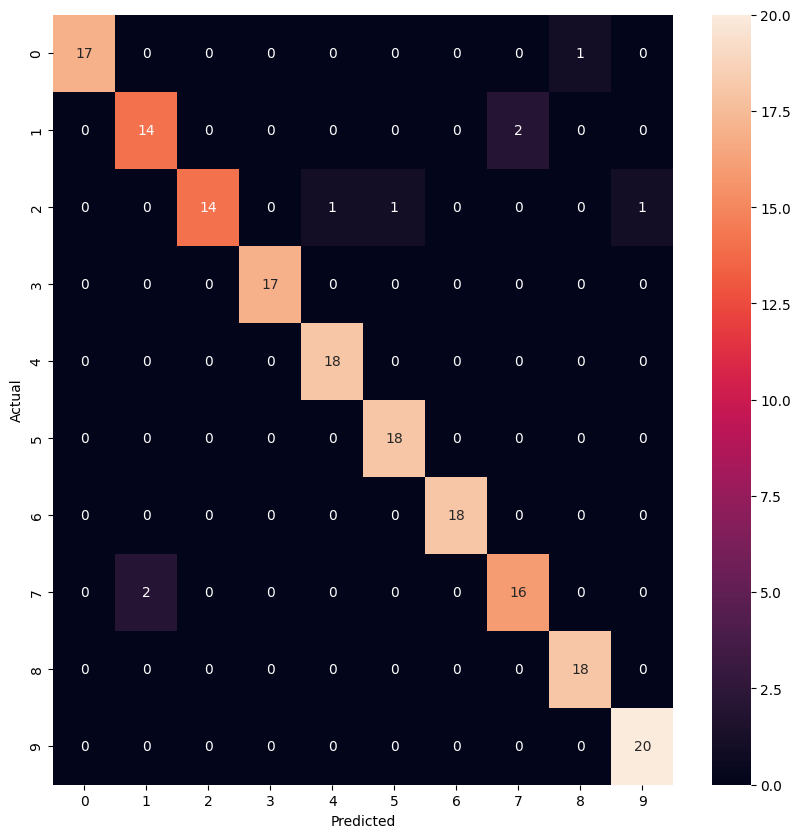

In [43]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [44]:
# Observatoin : we see in the updated model, there are less number of errors,
# whatever is not in diagonal is a error


6/6 [==============================] - 0s 4ms/step - loss: 27.7209 - accuracy: 0.8596
Test accuracy: 0.8595505356788635


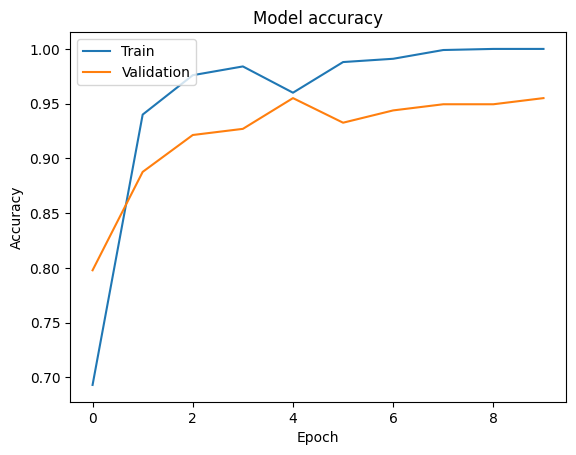

In [45]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
